In [1]:
from preprocess import *
from run_exp import *
%load_ext autoreload
%autoreload 2

In [2]:
data = get_full() # collect data

100%|█████████████████████████████████████████| 392/392 [01:15<00:00,  5.17it/s]


In [3]:
inp = prepare_input(data) # preprocess dataset

100%|███████████████████████████████████████████| 94/94 [00:06<00:00, 13.53it/s]


In [4]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(verbose=False) # define model for experiment
params = {} # define arguments, later saved in log
name = 'CatBoost' # define name of model

In [5]:
X_train, X_test, y_train, y_test = train_test_div(inp) # get train and test sets
pred = run_exp(model, X_train, X_test, y_train) # calculate models prediction

In [6]:
from sklearn.metrics import mean_squared_error as MSE
estim = {'MSE': MSE} # define metrics to be estimated
score = calc_metrics(y_test, pred, estim) # calculate metrics

In [7]:
fout = "../data/results.txt"
with open(fout, 'a') as f:
    print(name, params, score, file=f)

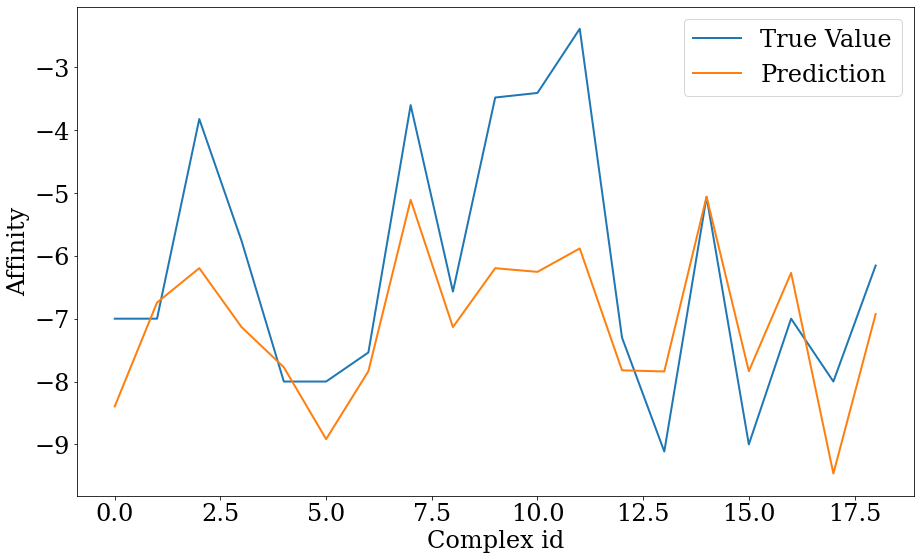

In [8]:
plot_result(y_test, pred, 'plots/' + name)